# The Graph Data Access

In this notebook, we retrieve live Rai system data from [The Graph](https://thegraph.com/explorer/subgraph/reflexer-labs/rai-mainnet?query=Example%20query) and save it as a CSV for analysis in the [Graph Analysis](TheGraphDataAnalysis.ipynb) notebook.


## Full Reflexer Labs dashboard query as obtained from Reflexer team
```
{
  internalCoinBalances(where: {accountHandler: "${GEB_STABILITY_FEE_TREASURY}"}) { 
    balance
  }
  accountingEngine(id: "current") { 
    activeDebtAuctions
    activeSurplusAuctions
  }
  collateralType(id: "ETH-A") {
    currentPrice {
      value
    }
    debtCeiling
    activeLiquidations
    liquidationsStarted
    totalCollateral
    totalAnnualizedStabilityFee
  }
  systemState(id: "current") { 
    coinUniswapPair {
      reserve0
      reserve1
    }
    currentCoinMedianizerUpdate{
      value
    }
    currentRedemptionRate {
      eightHourlyRate
      annualizedRate
      hourlyRate
      createdAt
    }
    currentRedemptionPrice {
      value
    }
    erc20CoinTotalSupply
    globalDebt
    globalDebtCeiling
    totalActiveSafeCount
    coinAddress
    wethAddress
    systemSurplus
    debtAvailableToSettle
  }
  dailyStats(first: 1000, orderDirection: desc) {
    globalDebt
    timestamp
    redemptionRate {
      twentyFourHourlyRate
    }
  }
  hourlyStats(first: 1000, orderBy: timestamp, orderDirection: desc) {
    globalDebt
    timestamp
    redemptionRate {
      hourlyRate
    }
    redemptionPrice{
      value
    }
    marketPriceUsd
  }
}
```

In [1]:
# import libraries
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

# Graph
url = 'https://api.thegraph.com/subgraphs/name/reflexer-labs/rai-mainnet'

## Hourly stats

In [2]:
query_header = '''
query {{
    hourlyStats(first: 1000, skip:{}) {{'''

query_tail = '''    
}
}'''

query_body = '''
 timestamp
    blockNumber
    redemptionRate {
      hourlyRate
    }
    redemptionPrice {
      id
      block
      value
      
    }
    marketPriceUsd # price of COIN in USD (uni pool price * ETH median price)
    marketPriceEth # Price of COIN in ETH (uni pool price)
    globalDebt
    erc20CoinTotalSupply
'''


n = 0
hourly = []
while True:
    print(f'request {n+1}')
    query = query_header.format(n*1000) + query_body + query_tail
    r = requests.post(url, json = {'query':query})
    s = json.loads(r.content)['data']['hourlyStats']
    print(f'results {len(s)}')
    hourly.extend(s)
    print(f'total {len(hourly)}')
    n += 1
    if len(s) < 1000:
        break
        
hourlyStats = pd.DataFrame(hourly)

request 1
results 1000
total 1000
request 2
results 258
total 1258


In [3]:
hourlyStats

,blockNumber,erc20CoinTotalSupply,globalDebt,marketPriceEth,marketPriceUsd,redemptionPrice,redemptionRate,timestamp
0,11857308,1988.440432971667032725,1988.577499489843641169436691184972,0.002589462210048543650949087456484599,4.709364363675082915930020079963684,"{'block': '11849022', 'id': '0xe313271188492c4...",{'hourlyRate': '1'},1613338681
1,11860793,2788.440432971667032725,2788.657935201718685876567866781341,0.002481355746535171105569862943787003,4.362594137056344705089877147817243,"{'block': '11860755', 'id': '0x40066774f6fb7d3...",{'hourlyRate': '1'},1613384616
2,11861399,2788.440432971667032725,2788.665345885220347865928144433965,0.002481355746535171105569862943787003,4.419265710853707004204445293455575,"{'block': '11861237', 'id': '0x5c67dbb323db039...",{'hourlyRate': '1'},1613393080
3,11861474,3048.440432971667032725,3048.645954953510904626288422086589,0.001768934955701819449591545208406114,3.194329891923853932595347583210722,"{'block': '11861237', 'id': '0x5c67dbb323db039...",{'hourlyRate': '1'},1613394096
4,11862329,3048.440432971667032725,3048.684410371148757911548668442965,0.001768934955701819449591545208406114,3.215446177235759811208395560891868,"{'block': '11862059', 'id': '0x57ccf842858a814...",{'hourlyRate': '1'},1613405255
...,...,...,...,...,...,...,...,...
1253,12289997,30853913.569045613275392485,31127021.21247003850248489516010609,0.001189278407326034574170766469449479,3.070454275177967118104707459593177,"{'block': '12289914', 'id': '0x8ed60879bfef10e...",{'hourlyRate': '0.999994753277347892279888746'},1619094569
1254,12290202,30927713.569045613275392485,31200885.46043556854231275239561661,0.001188851151511302823667530568900648,3.054196303540207314394359017944473,"{'block': '12290195', 'id': '0xaaed129d06ed5e8...",{'hourlyRate': '0.999994753277347892279888746'},1619097044
1255,12290961,30956663.601044236743793124,31229929.3790986056611886861691069,0.001168188188624974870537938447594397,3.029494624804262072300968304319407,"{'block': '12290778', 'id': '0x3a7cbbb1378922b...",{'hourlyRate': '0.999983871962859335753042432'},1619106611
1256,12291212,30956663.601044236743793124,31230000.23693428047236139974517672,0.001169352956496338250748781444852339,3.065635614212039868234390821803407,"{'block': '12291047', 'id': '0xd3e11aa8be112cf...",{'hourlyRate': '0.999983871962859335753042432'},1619110364


In [4]:
hourlyStats.redemptionPrice.values[-1]

{'block': '12291047',
 'id': '0xd3e11aa8be112cf0b82f76851e5bcc00bc10861bbe51e1390d11e584f3e3b694-356',
 'value': '3.015916811754549815201286033'}

In [5]:
hourlyStats.redemptionRate.values[-1]

{'hourlyRate': '0.999983871962859335753042432'}

In [6]:
hourlyStats['hourlyredemptionPriceActual'] = hourlyStats.redemptionPrice.apply(lambda x: x['value'])
hourlyStats['hourlyredemptionRateActual'] = hourlyStats.redemptionRate.apply(lambda x: x['hourlyRate'])
del hourlyStats['redemptionRate']
del hourlyStats['redemptionPrice']
hourlyStats['erc20CoinTotalSupply'] = hourlyStats['erc20CoinTotalSupply'].astype(float)
hourlyStats['globalDebt'] = hourlyStats['globalDebt'].astype(float)
hourlyStats['blockNumber'] = hourlyStats['blockNumber'].astype(int)
hourlyStats['hourlymarketPriceEth'] = hourlyStats['marketPriceEth'].astype(float)
del hourlyStats['marketPriceEth']
hourlyStats['hourlymarketPriceUsd'] = hourlyStats['marketPriceUsd'].astype(float)
del hourlyStats['marketPriceUsd']
hourlyStats['hourlyredemptionPriceActual'] = hourlyStats['hourlyredemptionPriceActual'].astype(float)
hourlyStats['hourlyredemptionRateActual'] = hourlyStats['hourlyredemptionRateActual'].astype(float)

In [7]:
hourlyStats.describe()

,blockNumber,erc20CoinTotalSupply,globalDebt,hourlyredemptionPriceActual,hourlyredemptionRateActual,hourlymarketPriceEth,hourlymarketPriceUsd
count,1.258000e+03,1.258000e+03,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000
mean,1.206310e+07,3.384736e+07,3.422288e+07,3.050732,0.999969,0.001723,3.143101
std,1.250621e+05,1.096515e+07,1.105517e+07,0.043282,0.000052,0.000305,0.304333
min,1.185731e+07,1.988440e+03,1.988577e+03,3.013686,0.999796,0.001168,2.833647
25%,1.195342e+07,3.216916e+07,3.248617e+07,3.018295,0.999944,0.001494,3.008886
50%,1.204954e+07,3.440539e+07,3.500183e+07,3.029834,0.999985,0.001681,3.075573
75%,1.217216e+07,4.092344e+07,4.119072e+07,3.083567,1.000005,0.001860,3.198626
max,1.229126e+07,4.899876e+07,4.918825e+07,3.140000,1.000051,0.003962,7.138834


## Daily stats - WIP

## System State 

In [8]:
blocknumbers = hourlyStats.blockNumber.values.tolist()

state = []
for i in blocknumbers:
    query = '''
    {
      systemState(block: {number:%s},id:"current") { 
        coinUniswapPair {
          reserve0
          reserve1
        }
        currentCoinMedianizerUpdate{
          value
        }
        currentRedemptionRate {
          eightHourlyRate
          annualizedRate
          hourlyRate
          createdAt
        }
        currentRedemptionPrice {
          value
        }
        erc20CoinTotalSupply
        globalDebt
        globalDebtCeiling
        totalActiveSafeCount
        coinAddress
        wethAddress
        systemSurplus
        debtAvailableToSettle
      }
    }
    ''' % i
    r = requests.post(url, json = {'query':query})
    s = json.loads(r.content)['data']['systemState']
    state.append(s)
        
systemState = pd.DataFrame(state)

systemState.head()
    

,coinAddress,coinUniswapPair,currentCoinMedianizerUpdate,currentRedemptionPrice,currentRedemptionRate,debtAvailableToSettle,erc20CoinTotalSupply,globalDebt,globalDebtCeiling,systemSurplus,totalActiveSafeCount,wethAddress
0,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,"{'reserve0': '661.764842786150958141', 'reserv...",None,{'value': '3.14'},"{'annualizedRate': '1', 'createdAt': '16132260...",0,2788.440432971667032725,2788.522357955470745187436691184972,115792089237316195423570985008687.9,0.06853325908830422221834559248594176,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
1,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,"{'reserve0': '676.933726709008306816', 'reserv...",None,{'value': '3.14'},"{'annualizedRate': '1', 'createdAt': '16132260...",0,2788.440432971667032725,2788.657935201718685876567866781341,115792089237316195423570985008687.9,0.1087511150258265757085590152709335,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
2,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,"{'reserve0': '676.933726709008306816', 'reserv...",None,{'value': '3.14'},"{'annualizedRate': '1', 'createdAt': '16132260...",0,3048.440432971667032725,3048.645954953510904626288422086589,115792089237316195423570985008687.9,0.1161617985274885650688366678947734,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
3,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,"{'reserve0': '801.933726709008306816', 'reserv...",{'value': '0'},{'value': '3.14'},"{'annualizedRate': '1', 'createdAt': '16132260...",0,3048.440432971667032725,3048.645954953510904626288422086589,115792089237316195423570985008687.9,0.1161617985274885650688366678947734,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
4,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,"{'reserve0': '801.933726709008306816', 'reserv...",{'value': '0'},{'value': '3.14'},"{'annualizedRate': '1', 'createdAt': '16132260...",0,3048.440432971667032725,3048.696064173575505967822069085347,115792089237316195423570985008687.9,0.1278156009542366213422373102764649,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2


In [9]:
systemState['blockNumber'] = blocknumbers

In [10]:
systemState.coinUniswapPair.values[-1]

{'reserve0': '20460327.352461967440980589',
 'reserve1': '23915.905405008361943882'}

In [11]:
systemState.currentCoinMedianizerUpdate.values[-1]

{'value': '3.08633033451791255'}

In [12]:
systemState.currentRedemptionRate.values[-1]

{'annualizedRate': '0.868243785693037168380519917',
 'createdAt': '1619099668',
 'eightHourlyRate': '0.999870982985820060253842543',
 'hourlyRate': '0.999983871962859335753042432'}

In [13]:
systemState.currentRedemptionPrice.values[-1]

{'value': '3.015916811754549815201286033'}

In [14]:
systemState.columns

Index(['coinAddress', 'coinUniswapPair', 'currentCoinMedianizerUpdate',
       'currentRedemptionPrice', 'currentRedemptionRate',
       'debtAvailableToSettle', 'erc20CoinTotalSupply', 'globalDebt',
       'globalDebtCeiling', 'systemSurplus', 'totalActiveSafeCount',
       'wethAddress', 'blockNumber'],
      dtype='object')

In [15]:
systemState['RedemptionRateAnnualizedRate'] = systemState.currentRedemptionRate.apply(lambda x: x['annualizedRate'])
systemState['RedemptionRateHourlyRate'] = systemState.currentRedemptionRate.apply(lambda x: x['hourlyRate'])
systemState['RedemptionRateEightHourlyRate'] = systemState.currentRedemptionRate.apply(lambda x: x['eightHourlyRate'])
systemState['RedemptionPrice'] = systemState.currentRedemptionPrice.apply(lambda x: x['value'])
systemState['RAIInUniswapV2(RAI/ETH)'] = systemState.coinUniswapPair.apply(lambda x: x['reserve0'])
del systemState['currentRedemptionRate']
del systemState['currentRedemptionPrice']
systemState['RedemptionRateAnnualizedRate'] = systemState['RedemptionRateAnnualizedRate'].astype(float)
systemState['RedemptionRateHourlyRate'] = systemState['RedemptionRateHourlyRate'].astype(float)
systemState['RedemptionRateEightHourlyRate'] = systemState['RedemptionRateEightHourlyRate'].astype(float)
systemState['RedemptionPrice'] = systemState['RedemptionPrice'].astype(float)
systemState['RAIInUniswapV2(RAI/ETH)'] = systemState['RAIInUniswapV2(RAI/ETH)'].astype(float)



In [16]:
systemState.head()

,coinAddress,coinUniswapPair,currentCoinMedianizerUpdate,debtAvailableToSettle,erc20CoinTotalSupply,globalDebt,globalDebtCeiling,systemSurplus,totalActiveSafeCount,wethAddress,blockNumber,RedemptionRateAnnualizedRate,RedemptionRateHourlyRate,RedemptionRateEightHourlyRate,RedemptionPrice,RAIInUniswapV2(RAI/ETH)
0,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,"{'reserve0': '661.764842786150958141', 'reserv...",None,0,2788.440432971667032725,2788.522357955470745187436691184972,115792089237316195423570985008687.9,0.06853325908830422221834559248594176,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,11857308,1.0,1.0,1.0,3.14,661.764843
1,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,"{'reserve0': '676.933726709008306816', 'reserv...",None,0,2788.440432971667032725,2788.657935201718685876567866781341,115792089237316195423570985008687.9,0.1087511150258265757085590152709335,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,11860793,1.0,1.0,1.0,3.14,676.933727
2,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,"{'reserve0': '676.933726709008306816', 'reserv...",None,0,3048.440432971667032725,3048.645954953510904626288422086589,115792089237316195423570985008687.9,0.1161617985274885650688366678947734,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,11861399,1.0,1.0,1.0,3.14,676.933727
3,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,"{'reserve0': '801.933726709008306816', 'reserv...",{'value': '0'},0,3048.440432971667032725,3048.645954953510904626288422086589,115792089237316195423570985008687.9,0.1161617985274885650688366678947734,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,11861474,1.0,1.0,1.0,3.14,801.933727
4,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,"{'reserve0': '801.933726709008306816', 'reserv...",{'value': '0'},0,3048.440432971667032725,3048.696064173575505967822069085347,115792089237316195423570985008687.9,0.1278156009542366213422373102764649,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,11862329,1.0,1.0,1.0,3.14,801.933727


## Internal Coin Balances - WIP

## Accounting Engine - WIP

## Eth price

In [17]:
eth_price = []
for i in blocknumbers:
    query = '''
    {
      collateralType(block: {number:%s}, id: "ETH-A") {
        currentFsmUpdate {
          value
        }
        debtCeiling
        activeLiquidations
        liquidationsStarted
        totalCollateral
        totalAnnualizedStabilityFee
      }
    }
    ''' % i
    r = requests.post(url, json = {'query':query})
    s = json.loads(r.content)['data']['collateralType']
    eth_price.append(s)
        
collateralType = pd.DataFrame(eth_price)

collateralType['blockNumber'] = blocknumbers
collateralType.head()

,activeLiquidations,currentFsmUpdate,debtCeiling,liquidationsStarted,totalAnnualizedStabilityFee,totalCollateral,blockNumber
0,0,{'value': '1803.65643044'},10000000,0,1.019999999999999999972831879,14.892360473369843164,11857308
1,0,{'value': '1803.65643044'},10000000,0,1.019999999999999999972831879,14.892360473369843164,11860793
2,0,{'value': '1763.97493608'},10000000,0,1.019999999999999999972831879,16.892360473369843164,11861399
3,0,{'value': '1763.97493608'},10000000,0,1.019999999999999999972831879,16.892360473369843164,11861474
4,0,{'value': '1803.89114874'},10000000,0,1.019999999999999999972831879,16.892360473369843164,11862329


In [18]:
collateralType['Eth_price'] = collateralType.currentFsmUpdate.apply(lambda x: x['value'])
collateralType['Eth_price'] = collateralType['Eth_price'].astype(float)

In [19]:
hourlyStats = hourlyStats.merge(collateralType,how='inner',on='blockNumber')

# remove duplicate values
del systemState['erc20CoinTotalSupply']
del systemState['globalDebt']

hourlyStats = hourlyStats.merge(systemState,how='inner',on='blockNumber')
hourlyStats.to_csv('saved_results/RaiLiveGraphData.csv')

## Safes

In [81]:
safehistories = []
for i in blocknumbers:
    query = '''
    {
      safes(block: {number:%s}) {
            collateral
            debt
      }
    }
    ''' % i
    r = requests.post(url, json = {'query':query})
    s = json.loads(r.content)['data']['safes']
    t = pd.DataFrame(s)
    t['collateral'] = t['collateral'].astype(float)
    t['debt'] = t['debt'].astype(float)
    safehistories.append(pd.DataFrame(t.sum().to_dict(),index=[0]))

safe_history = pd.concat(safehistories)

safe_history['blockNumber'] = blocknumbers
safe_history.reset_index(inplace=True)
del safe_history['index']

safe_history['collateral_diff'] = safe_history['collateral'].diff()
safe_history['debt_diff'] = safe_history['debt'].diff()
safe_history.head()

,collateral,debt,blockNumber
0,14.89236,2788.385291,11857308
0,14.89236,2788.385291,11860793
0,16.89236,3048.358490,11861399
0,16.89236,3048.358490,11861474
0,16.89236,3048.358490,11862329


In [32]:
# get all safe ids
query_header = '''
query {{
    safes(first: 1000, skip:{}) {{'''

query_tail = '''    
}
}'''

query_body = '''
             id
            safeId
            collateralType {
              id
            }
            collateral
            debt
            owner {
              id
            }
            safeHandler # Address of the Safe owner (top level ownership)
            owner {
              id
            } # Optional proxy address (if the owner used a proxy to create the Safe)
            proxy {
              id
            } # Optional proxy address (if the owner used a proxy to create the Safe)
            createdAt # Timestamp of the block at which this Safe was opened [seconds]
            createdAtBlock # Block number at which this Safe was opened
            createdAtTransaction # Hash of the transaction that opened the Safe
            modifiedAtBlock
'''


n = 0
safes = []
while True:
    print(f'request {n+1}')
    query = query_header.format(n*1000) + query_body + query_tail
    r = requests.post(url, json = {'query':query})
    s = json.loads(r.content)['data']['safes']
    print(f'results {len(s)}')
    safes.extend(s)
    print(f'total {len(safes)}')
    n += 1
    if len(s) < 1000:
        break
        
safes_df = pd.DataFrame(safes)

request 1
results 1000
total 1000
request 2
results 924
total 1924


In [50]:
safes_df

,collateral,collateralType,createdAt,createdAtBlock,createdAtTransaction,debt,id,modifiedAtBlock,owner,proxy,safeHandler,safeId
0,0,{'id': 'ETH-A'},1614276509,11927837,0xb513acdb3d62826757187dfc6e8650f6b4a5aafc082a...,0,0x004f347f017acd2fa14fa7fe7414216cc00f8ac1-ETH-A,11928153,{'id': '0xd912c21ca7c215594ce55de8080a8cd6b7a0...,{'id': '0xc2c59f75836656dd23e3eb89e55fa74bb5ab...,0x004f347f017acd2fa14fa7fe7414216cc00f8ac1,1133
1,0,{'id': 'ETH-A'},1616861323,12122070,0xba8455900bca1742918ef6355e6283dc3ab518896be3...,0,0x0070916a66f728dc0457dfacb96c89d313955dd9-ETH-A,12220979,{'id': '0xd30391e21741c54c32987bcfca3d880e6d26...,{'id': '0x40cd68d8c3795fb846c58c4ff8ba0e40b8f9...,0x0070916a66f728dc0457dfacb96c89d313955dd9,1753
2,0,{'id': 'ETH-A'},1613944193,11902865,0xc754de50823a71a38dd2cb65576c5669a34504d2f5e9...,0,0x0082d2052d608c46b74387dd548e99c615ef1e4c-ETH-A,11992247,{'id': '0xf33e5fd85a5905380c5f1b0ae444bb995287...,{'id': '0x5f7fb93454d64f386b1e559aa694bd85a003...,0x0082d2052d608c46b74387dd548e99c615ef1e4c,878
3,4,{'id': 'ETH-A'},1614937613,11977561,0xf7592173317c4b065a2727df0f9b8dd37a64403104cb...,799.142093799608254196,0x0092eb3f04319f7ef269f71f3dda2eda5efe438b-ETH-A,11977561,{'id': '0x0b5a3054e7d7c25c23ee8b7fd7cba3d2660b...,{'id': '0x7fbfe4b7ee75c2f6d21378b9c0e1b26be851...,0x0092eb3f04319f7ef269f71f3dda2eda5efe438b,1352
4,3,{'id': 'ETH-A'},1615258265,12001739,0x2da501ec34916c8ffb6286f9d4671c12e3d3b3f715c0...,798.981203283309975931,0x00b9b919d6bc0b70fd4566d84f77de1f42b4dbde-ETH-A,12001739,{'id': '0xdd99fa1e4312146cf5029be7bdeb18c912f4...,{'id': '0x83bc84ef618c36b3642416f67f344406c9b1...,0x00b9b919d6bc0b70fd4566d84f77de1f42b4dbde,1491
...,...,...,...,...,...,...,...,...,...,...,...,...
1919,40,{'id': 'ETH-A'},1615299608,12004773,0xa3222b673cda66e504e4eede4268e2796fb9b4e40275...,7490.254325207458258746,0xff764ccaf7e529aee2ce925fcf7ea3f2434f59ee-ETH-A,12004773,{'id': '0x1a68dbe7bb1160bb390d06d68f3e41516cc8...,{'id': '0x57823f492bb5bbdc1fec37bf5f3c27607e0a...,0xff764ccaf7e529aee2ce925fcf7ea3f2434f59ee,1516
1920,0,{'id': 'ETH-A'},1613976307,11905298,0xe33de60560a7380a54945a343120aee9db2c205dd3f3...,0,0xff7fedfd85f861a61d95de9e3c83eaf4e06de5cc-ETH-A,12153701,{'id': '0x4d30a3cd1c738cf64101e699bb19f4f2d96d...,{'id': '0x5525ce6398fb2da367570ab9a782ab6cf360...,0xff7fedfd85f861a61d95de9e3c83eaf4e06de5cc,937
1921,128,{'id': 'ETH-A'},1613665650,11881902,0x705ce14acf74bc66c3da7632d5a8c63d0ca3a442aaac...,51996.571735784516277477,0xff9b5fd13b60f1e7111bb864c7b561aaadfead2a-ETH-A,12281108,{'id': '0x6ddbfa02a80ab01d0b31b6cafe18ad758f7e...,{'id': '0x7d4560797f78ae0eca881648d171afb4ec17...,0xff9b5fd13b60f1e7111bb864c7b561aaadfead2a,295
1922,9,{'id': 'ETH-A'},1613649838,11880726,0xfb1866c982e38d9dfd6caee522f9d46bc957c4c4f8f5...,1999.471437164020345288,0xffdb87ebd534f67da7aefa8ad05aeb6de27b241d-ETH-A,11880726,{'id': '0xee779e4b3e7b11454ed80cfe12cf48ee3ff4...,{'id': '0x4ea2699ba7f0d81be2f033c4f80113a6d03a...,0xffdb87ebd534f67da7aefa8ad05aeb6de27b241d,271


In [22]:
safes_df.query('safeId == "45"')

,collateral,collateralType,createdAt,createdAtBlock,createdAtTransaction,debt,id,owner,proxy,safeHandler,safeId
1914,30,{'id': 'ETH-A'},1613572537,11874913,0x91cd5484ea440c9dbad7bbcac97733cc56852e989f17...,5197.607015594878378064,0xff317a6ed7f48890e0e368f7d3353e1bb856b58b-ETH-A,{'id': '0xdf290293c4a4d6ebe38fd7085d7721041f92...,{'id': '0x95dae23d9106dc7b337084109d440c479ba8...,0xff317a6ed7f48890e0e368f7d3353e1bb856b58b,45


In [23]:
# {
#   modifySAFECollateralization(id:"0xff317a6ed7f48890e0e368f7d3353e1bb856b58b-ETH-A") {
#     id
#     safe {
#       id
#     }
#     safeHandler
#     collateralType {
#       id
#     }
#     deltaCollateral
#     deltaDebt
#     accumulatedRate
#     createdAt
#     createdAt
#     createdAtTransaction
#   }
# }



In [24]:
safes_df.debt = safes_df.debt.apply(float)
safes_df.collateral = safes_df.collateral.apply(float)
safes_df['debt_ratio'] = safes_df.debt/safes_df.collateral 

<AxesSubplot:>

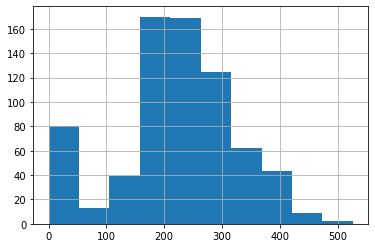

In [25]:
safes_df.debt_ratio.hist()

<AxesSubplot:>

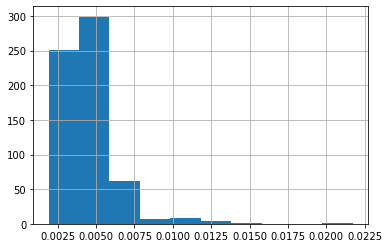

In [26]:
safes_df[safes_df.debt_ratio>0].debt_ratio.apply(lambda x :1/x).hist()

## Conclusion

Using The Graph, a lot of data about the Rai system can be obtained for analyzing the health of the system. With some data manipulation, these data streams could be intergrated into the Rai cadCAD model to turn it into a true decision support system. 
